# Quantum Phase Estimation

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator $U$, the algorithm estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. Since $U$ is unitary, all of its eigenvalues have a norm of 1.

## General Overview

The general quantum circuit for phase estimation is shown below. The top register contains $t$ 'counting' qubits, and the bottom contains qubits in the state $|\psi\rangle$:

### Intuition
The quantum phase estimation algorithm uses phase kickback to write the phase of $U$ (in the Fourier basis) to the $t$ qubits in the counting register. I then use the inverse QFT to translate this from the Fourier basis into the computational basis, which I can measure.

I remember that in the Fourier basis the topmost qubit completes one full rotation when counting between $0$ and $2^t$. To count to a number, $x$ between $0$ and $2^t$, I rotate this qubit by $\tfrac{x}{2^t}$ around the z-axis. For the next qubit I rotate by $\tfrac{2x}{2^t}$, then $\tfrac{4x}{2^t}$ for the third qubit.

When I use a qubit to control the $U$-gate, the qubit will turn (due to kickback) proportionally to the phase $e^{2i\pi\theta}$. I can use successive $CU$-gates to repeat this rotation an appropriate number of times until I have encoded the phase theta as a number between $0$ and $2^t$ in the Fourier basis. 

Then I simply use $QFT^\dagger$ to convert this into the computational basis.

### A Mathematical Foundation

As mentioned above, this circuit estimates the phase of a unitary operator $U$. It estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, where $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. The circuit operates in the following steps:

**Setup**: $\vert\psi\rangle$ is in one set of qubit registers. An additional set of $n$ qubits form the counting register on which I will store the value $2^n\theta$: 

$$ \psi_0 = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

**Superposition**: I Apply a $n$-bit Hadamard gate operation $H^{\otimes n}$ on the counting register: 

$$ \psi_1 = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$

**Controlled Unitary Operations**: I need to introduce the controlled unitary $C-U$ that applies the unitary operator $U$ on the target register only if its corresponding control bit is $|1\rangle$. Since $U$ is a unitary operatory with eigenvector $|\psi\rangle$ such that $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, this means: 

$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$

Applying all the $n$ controlled operations $C − U^{2^j}$ with $0\leq j\leq n-1$, and using the relation $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$:

$$
\begin{aligned}
\psi_{2} & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}$$

where $k$ denotes the integer representation of n-bit binary numbers. 

**Inverse Fourier Transform**: Notice that the above expression is exactly the result of applying a quantum Fourier transform as we derived in the notebook on Quantum Fourier Transform and its Qiskit Implementation. Recall that QFT maps an n-qubit input state $\vert x\rangle$ into an output as:

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

Replacing $x$ by $2^n\theta$ in the above expression gives exactly the expression derived in step 2 above. Therefore, to recover the state $\vert2^n\theta\rangle$, apply an inverse Fourier transform on the auxiliary register. Doing so, I find:

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$ 

**Measurement**: 
The above expression peaks near $x = 2^n\theta$. For the case when $2^n\theta$ is an integer, measuring in the computational basis gives the phase in the auxiliary register with high probability: 

$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$

For the case when $2^n\theta$ is not an integer, it can be shown that the above expression still peaks near $x = 2^n\theta$ with probability better than $4/\pi^2 \approx 40\%$.

## Example: T-gate

I can take a gate I know well, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. I now remember that the $T$-gate adds a phase of $e^\frac{i\pi}{4}$ to the state $|1\rangle$:

$$ T|1\rangle = 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\begin{bmatrix}
0\\
1\\ 
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$

Since QPE will give me $\theta$ where:

$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$

I expect to find:

$$\theta = \frac{1}{8}$$

In this example I will use three qubits and obtain an _exact_ result which is not an estimation!

### Creating the Circuit
First I will prepare the environment:

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

Now, to set up the quantum circuit; I will use four qubits -- qubits 0 to 2 as counting qubits, and qubit 3 as the eigenstate of the unitary operator ($T$). 

I initialize $\vert\psi\rangle = \vert1\rangle$ by applying an $X$ gate:

In [2]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

Next, I apply Hadamard gates to the counting qubits:

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

Next I perform the controlled unitary operations. 

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3); # This is C-U
    repetitions *= 2
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_3: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«               
«q_0: ──────────
«               
«q_1: ──────────
«               
«q_2: ────■─────
«     ┌───┴────┐
«q_3: ┤ P(π/4) ├
«     └────────┘
«c: 3/══════════
«

I apply the inverse quantum Fourier transformation to convert the state of the counting register. Here I give the code for $QFT^\dagger$:

In [5]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

I then measure the counting register:

In [6]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 3)
# Measure
qpe.barrier()
for n in range(3):
    qpe.measure(n,n)

In [7]:
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_3: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                ░    ┌───┐                                            ░ ┌─┐   »
«q_0: ───────────░──X─┤ H ├─────■───────────────■──────────────────────░─┤M├───»
«                ░  │ └───┘┌────┴────┐┌───┐     │                      ░ └╥┘┌─┐»
«q_1: ───────────░──┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■───────────░──╫─┤M├»
«                ░  │      └─────────┘└───┘┌────┴────┐┌────┴────┐┌───┐ ░  ║ └╥┘»
«q_2: ────■──────░──X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫─»
«     ┌───┴────┐ ░                         └─────────┘└─────────┘└───┘ ░  ║  ║ »
«q_3: ┤ P(π/4) ├─░─────────────────────────────────────────────────────░──╫──╫─»
«     └────────┘ ░                                                     ░  ║  ║ »
«c: 3/════════════════════════════════════════════════════════════════════╩══╩═»
«                                                                         0  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«q_3: ─╫─
«      ║ 
«c: 3/═╩═
«      2

### Results

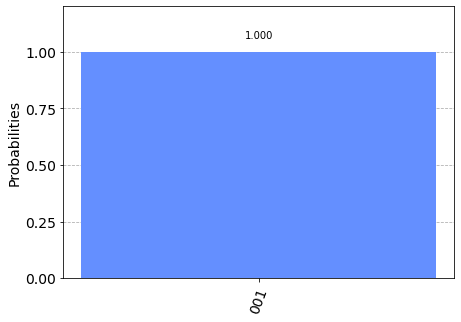

In [8]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 2048
t_qpe = transpile(qpe, qasm_sim)
qobj = assemble(t_qpe, shots=shots)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

I can see I get one result (`001`) with certainty, which translates to the decimal: `1`. I now need to divide our result (`1`) by $2^n$ to get $\theta$:

$$ \theta = \frac{1}{2^3} = \frac{1}{8} $$

This is exactly the result I expected!

## Example: Getting More Precision in the problem

Instead of a $T$-gate, I can use a gate with $\theta = \frac{1}{3}$. I set up the circuit the same as the last example:

In [9]:
# Create and set up circuit
qpe2 = QuantumCircuit(4, 3)

# Apply H-Gates to counting qubits:
for qubit in range(3):
    qpe2.h(qubit)

# Prepare our eigenstate |psi>:
qpe2.x(3)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe2.cp(angle, counting_qubit, 3);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe2, 3)

# Measure of course!
for n in range(3):
    qpe2.measure(n,n)

qpe2.draw()

┌───┐                                                                  »
q_0: ┤ H ├─────■────────────────────────────────────────────────────────────»
     ├───┤     │                                                            »
q_1: ┤ H ├─────┼──────────■──────────■──────────────────────────────────────»
     ├───┤     │          │          │                                      »
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
q_3: ┤ X ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                   ┌───┐                                      ┌─┐           
«q_0: ────────────X─┤ H ├─────■───────────────■────────────────┤M├───────────
«                 │ └───┘┌────┴────┐┌───┐     │                └╥┘     ┌─┐   
«q_1: ────────────┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■──────╫──────┤M├───
«                 │      └─────────┘└───┘┌────┴────┐┌────┴────┐ ║ ┌───┐└╥┘┌─┐
«q_2: ─────■──────X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├─╫─┤ H ├─╫─┤M├
«     ┌────┴────┐                        └─────────┘└─────────┘ ║ └───┘ ║ └╥┘
«q_3: ┤ P(2π/3) ├───────────────────────────────────────────────╫───────╫──╫─
«     └─────────┘                                               ║       ║  ║ 
«c: 3/══════════════════════════════════════════════════════════╩═══════╩══╩═
«                                                               0       1  2

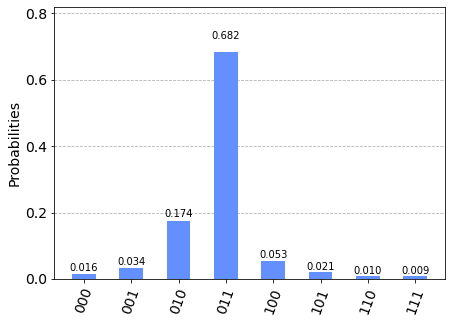

In [10]:
# Let's see the results!
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, qasm_sim)
qobj = assemble(t_qpe2, shots=shots)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

I am expecting the result $\theta = 0.3333\dots$, and I can see my most likely results are `010(bin) = 2(dec)` and `011(bin) = 3(dec)`. These two results would tell me that $\theta = 0.25$ (off by 25%) and $\theta = 0.375$ (off by 13%) respectively. The true value of $\theta$ lies between the values I can get from the counting bits, and this gives me uncertainty and imprecision in my answer. This can be fixed as follows:

### A Solution?

To get more precision I simply add more counting qubits. I am going to add two more counting qubits:

In [11]:
# Create and set up circuit
qpe3 = QuantumCircuit(6, 5)

# Apply H-Gates to counting qubits:
for qubit in range(5):
    qpe3.h(qubit)

# Prepare our eigenstate |psi>:
qpe3.x(5)

# Do the controlled-U operations:
angle = 2*math.pi/3
repetitions = 1
for counting_qubit in range(5):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, 5);
    repetitions *= 2

# Do the inverse QFT:
qft_dagger(qpe3, 5)

# Measure of course!
qpe3.barrier()
for n in range(5):
    qpe3.measure(n,n)

qpe3.draw()

┌───┐                                                                  »
q_0: ┤ H ├─────■────────────────────────────────────────────────────────────»
     ├───┤     │                                                            »
q_1: ┤ H ├─────┼──────────■──────────■──────────────────────────────────────»
     ├───┤     │          │          │                                      »
q_2: ┤ H ├─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
     ├───┤     │          │          │          │          │          │     »
q_3: ┤ H ├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
     ├───┤     │          │          │          │          │          │     »
q_4: ┤ H ├─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
     ├───┤┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
q_5: ┤ X ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
     └───┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
c: 5/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ─────■────────────────────────────────────────────────────────────»
«          │                                                            »
«q_3: ─────┼──────────■──────────■──────────■──────────■──────────■─────»
«          │          │          │          │          │          │     »
«q_4: ─────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────»
«     ┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
«q_5: ┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
«     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
«c: 5/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────X───────────────────────────»
«                                           │                           »
«q_2: ──────────────────────────────────────┼───────────────────────────»
«                                           │                           »
«q_3: ─────■──────────■──────────■──────────X───────────────────────────»
«          │          │          │                                      »
«q_4: ─────┼──────────┼──────────┼──────────■──────────■──────────■─────»
«     ┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐┌────┴────┐»
«q_5: ┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├┤ P(2π/3) ├»
«     └─────────┘└─────────┘└─────────┘└─────────┘└─────────┘└─────────┘»
«c: 5/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                       »
«q_0: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_3: ──────────────────────────────────────────────────────────────────»
«                      

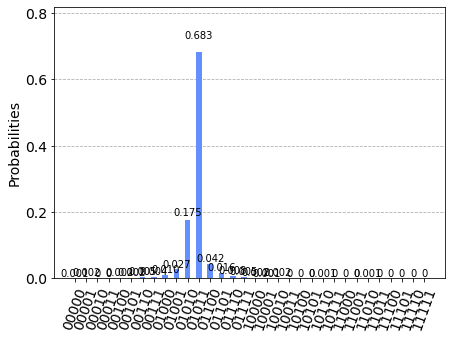

In [12]:
# Let's see the results!
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 4096
t_qpe3 = transpile(qpe3, qasm_sim)
qobj = assemble(t_qpe3, shots=shots)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

The two most likely measurements are now `01011` (decimal 11) and `01010` (decimal 10). Measuring these results would tell me $\theta$ is:

$$
\theta = \frac{11}{2^5} = 0.344,\;\text{  or  }\;\; \theta = \frac{10}{2^5} = 0.313
$$

These two results differ from $\frac{1}{3}$ by 3% and 6% respectively. Significantly better precision!

## Experimenting with Real Devices

I can run the circuit of a QPE on a real device, To remind myself of the circuit:

In [13]:
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├────■───────────────────────────────────────────────────────»
     ├───┤    │                                                       »
q_1: ┤ H ├────┼─────────■─────────■───────────────────────────────────»
     ├───┤    │         │         │                                   »
q_2: ┤ H ├────┼─────────┼─────────┼─────────■─────────■─────────■─────»
     ├───┤┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐┌───┴────┐»
q_3: ┤ X ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├┤ P(π/4) ├»
     └───┘└────────┘└────────┘└────────┘└────────┘└────────┘└────────┘»
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«                ░    ┌───┐                                            ░ ┌─┐   »
«q_0: ───────────░──X─┤ H ├─────■───────────────■──────────────────────░─┤M├───»
«                ░  │ └───┘┌────┴────┐┌───┐     │                      ░ └╥┘┌─┐»
«q_1: ───────────░──┼──────┤ P(-π/2) ├┤ H ├─────┼──────────■───────────░──╫─┤M├»
«                ░  │      └─────────┘└───┘┌────┴────┐┌────┴────┐┌───┐ ░  ║ └╥┘»
«q_2: ────■──────░──X──────────────────────┤ P(-π/4) ├┤ P(-π/2) ├┤ H ├─░──╫──╫─»
«     ┌───┴────┐ ░                         └─────────┘└─────────┘└───┘ ░  ║  ║ »
«q_3: ┤ P(π/4) ├─░─────────────────────────────────────────────────────░──╫──╫─»
«     └────────┘ ░                                                     ░  ║  ║ »
«c: 3/════════════════════════════════════════════════════════════════════╩══╩═»
«                                                                         0  1 »
«        
«q_0: ───
«        
«q_1: ───
«     ┌─┐
«q_2: ┤M├
«     └╥┘
«q_3: ─╫─
«      ║ 
«c: 3/═╩═
«      2

In [16]:
IBMQ.load_account()
from qiskit.tools.monitor import job_monitor
provider = IBMQ.get_provider(hub='ibm-q')
santiago = provider.get_backend('ibmq_santiago')

# Run with 2048 shots
shots = 2048
t_qpe = transpile(qpe, santiago, optimization_level=3)
qc = assemble(t_qpe, shots=shots)
job = santiago.run(qc)
job_monitor(job)

<ipython-input-16-cbbd8bec7ac3>:10: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = santiago.run(qc)


Job Status: job has successfully run


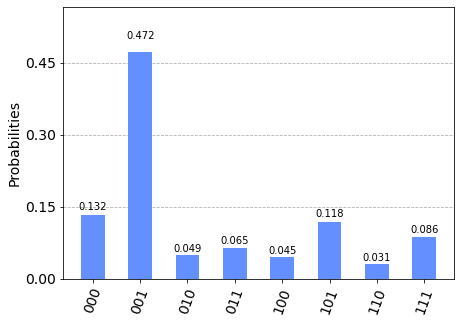

In [17]:
# get the results from the computation
results = job.result()
answer = results.get_counts(qpe)

plot_histogram(answer)

I can hopefully see that the most likely result is `001` which is the result I would expect from the simulator. Unlike the simulator, there is a probability of measuring something other than `001`, this is due to noise and gate errors in the quantum computer.

## 7. References 

1. Michael A. Nielsen and Isaac L. Chuang. 2011. Quantum Computation and Quantum Information: 10th Anniversary Edition (10th ed.). Cambridge University Press, New York, NY, USA. 